RETRIEVAL

In [ ]:
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity
from skimage.measure import compare_ssim as ssim

In [ ]:
random_image_grp=np.random.randint(len(test_y))
random_image_grp_class=test_y[random_image_grp]
image_base_path="/content/drive/My Drive/ML Project data/train"
#print(df.shape[0])
from tensorflow.keras.preprocessing import image
train_imgs = []
with open('/content/drive/MyDrive/Mid_Data/train.csv', 'r') as file:
  reader = csv.reader(file)
  for row in reader:
    train_imgs.append(row)
datapath='/content/drive/MyDrive/Mid_Data'
random.shuffle(train_imgs)
train_img = []
files=[]
for ind in range(len(train_imgs)):
  if train_imgs[ind][1]==random_image_grp_class:
    impath = datapath+"/train/"+train_imgs[ind][0]
    files.append(impath)
    im = image.load_img(impath, target_size=(224, 224))
    x = image.img_to_array(im)
    x=np.expand_dims(x,axis=0)
    train_img.append(x)
    if(len(train_img)==1000):
      break

553467904/553467096 [==============================] - 3s 0us/step


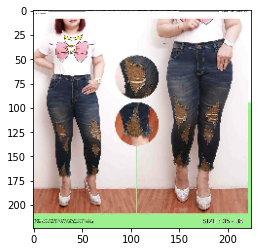

In [ ]:
closest_images=5
vgg_model=vgg16.VGG16(weights='imagenet')
feat_extractor=Model(inputs=vgg_model.input,outputs=vgg_model.get_layer("fc2").output)
my_test_image=load_img(datapath+"/test/"+test_imgs[random_image_grp][0],target_size=(224,224))
my_test_image_path=datapath+"/test/"+test_imgs[random_image_grp][0]
plt.imshow(my_test_image)
plt.savefig(datapath+"/SVM&CNN/org.png")
my_test_image=img_to_array(my_test_image)
train_img.append(np.expand_dims(my_test_image,axis=0))
files.append(my_test_image_path)

#feat_extractor.summary()

In [ ]:
image_batch=np.expand_dims(my_test_image,axis=0)
#print('image batch size', image_batch.shape)
processed_image=preprocess_input(image_batch.copy())
img_features=feat_extractor.predict(processed_image)

In [ ]:
from matplotlib import pyplot

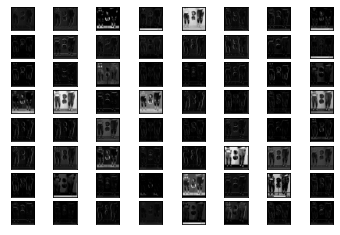

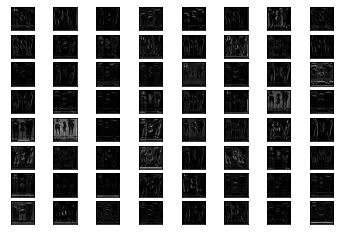

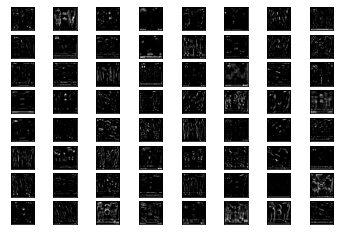

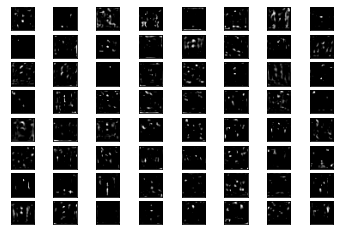

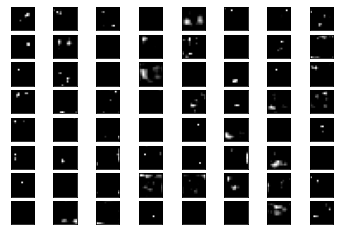

In [ ]:
model=vgg16.VGG16(weights='imagenet')
ixs=[2,5,9,13,17]
outputs=[model.layers[i].output for i in ixs]
model=Model(inputs=model.inputs,outputs=outputs)
img=load_img(datapath+"/test/"+test_imgs[random_image_grp][0],target_size=(224,224))
img=img_to_array(img)
img=np.expand_dims(img,axis=0)
feature_maps=model.predict(img)
square=8
layer=1
for fmap in feature_maps:
  ix=1
  for _ in range(square):
    for _ in range(square):
      ax=pyplot.subplot(square,square,ix)
      ax.set_xticks([])
      ax.set_yticks([])
      pyplot.imshow(fmap[0,:,:,ix-1],cmap='gray')
      ix+=1
  pyplot.savefig(datapath+'/SVM&CNN/layer_'+str(layer)+'.png')
  pyplot.show()
  layer+=1

In [ ]:
images=np.vstack(train_img)
processed_imgs=preprocess_input(images.copy())
imgs_features=feat_extractor.predict(processed_imgs)
print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(1001, 4096)

In [ ]:
print("number of images:",len(files))

number of images: 1001


In [ ]:
import pandas as pd
cos_similarity=cosine_similarity(imgs_features)
cos_similarities_df=pd.DataFrame(cos_similarity,columns=files,index=files)
cos_similarities_df.head()

,/content/drive/MyDrive/Mid_Data/train/051ae615f3f5a32332211f2211056f37.jpg,/content/drive/MyDrive/Mid_Data/train/4abad2d27a46b5273311168bbf6f9721.jpg,/content/drive/MyDrive/Mid_Data/train/a4a297c00867118e723396f94fdd9884.jpg,/content/drive/MyDrive/Mid_Data/train/c74a53a4d639749325eb74086050124f.jpg,/content/drive/MyDrive/Mid_Data/train/50f60d55a829cb97114a71c8413f1f85.jpg,/content/drive/MyDrive/Mid_Data/train/bc9da3cd246a223de23595afef42c77e.jpg,/content/drive/MyDrive/Mid_Data/train/9517c583ad5b05c220ca981d9082792f.jpg,/content/drive/MyDrive/Mid_Data/train/24687068b9e8c4101dd6d22c76f5c4f2.jpg,/content/drive/MyDrive/Mid_Data/train/bced1472ec3cd2a46ab66acdb6fc7311.jpg,/content/drive/MyDrive/Mid_Data/train/f79a624bc8d719c7ce637fb4610cab9b.jpg,/content/drive/MyDrive/Mid_Data/train/d16000f6e80243095348de526c7a7349.jpg,/content/drive/MyDrive/Mid_Data/train/cfe09257d8783a9a39a83ca9128dc728.jpg,/content/drive/MyDrive/Mid_Data/train/97d38d203c91dfb825392d5327a5f40c.jpg,/content/drive/MyDrive/Mid_Data/train/bdfa9379b4419fbdaf393aa083db6ddd.jpg,/content/drive/MyDrive/Mid_Data/train/3a32b5abc119936a39191793e589add6.jpg,/content/drive/MyDrive/Mid_Data/train/e3988daf81d87247c3acc80f34af23bf.jpg,/content/drive/MyDrive/Mid_Data/train/1829211c1f874bbcdad5f09c1e6f51a0.jpg,/content/drive/MyDrive/Mid_Data/train/8dc9e55c281c979a0580f6c5bec595e3.jpg,/content/drive/MyDrive/Mid_Data/train/2f9de6ea44804ba7345a7be29215948d.jpg,/content/drive/MyDrive/Mid_Data/train/d8ada4b06f001b75ec93ae02345ed637.jpg,/content/drive/MyDrive/Mid_Data/train/05f8f2919d6fde2820228767b0474f74.jpg,/content/drive/MyDrive/Mid_Data/train/e55d88b8febb3bc51b480b227005e2af.jpg,/content/drive/MyDrive/Mid_Data/train/7738d170b76812646b7b63747ead58fb.jpg,/content/drive/MyDrive/Mid_Data/train/8ed81b3cd06590d1504746c0c55f48dc.jpg,/content/drive/MyDrive/Mid_Data/train/d50fc9a3c33b530d65e2e2fe36bcfd48.jpg,/content/drive/MyDrive/Mid_Data/train/ce50aa24638902a55fc7e1fbee212abd.jpg,/content/drive/MyDrive/Mid_Data/train/8170c07aaf3656cdb659cbc9368f1ec4.jpg,/content/drive/MyDrive/Mid_Data/train/47dab113c54e4fa2acabccb25d54b4f6.jpg,/content/drive/MyDrive/Mid_Data/train/8ad91babd7a1d15bbb7cf3b8df9d4696.jpg,/content/drive/MyDrive/Mid_Data/train/8017ced2b1501565298d8a386d4a161d.jpg,/content/drive/MyDrive/Mid_Data/train/2b911873d38b66e547c1a6e88c671af0.jpg,/content/drive/MyDrive/Mid_Data/train/64e1bceb92a7f64045bd9d52c8d6b940.jpg,/content/drive/MyDrive/Mid_Data/train/8c8dc3e5d75bfb842a3c15304bb37266.jpg,/content/drive/MyDrive/Mid_Data/train/fc499994d6a4f7cb46a52f18bcd190e5.jpg,/content/drive/MyDrive/Mid_Data/train/9e6af0b2e3298a94159981bbd42f19fe.jpg,/content/drive/MyDrive/Mid_Data/train/a44fe7a51a289f24c8ea8ef20406e42f.jpg,/content/drive/MyDrive/Mid_Data/train/40d4c01e50a1f75bb30f085d2fa3fbdc.jpg,/content/drive/MyDrive/Mid_Data/train/4d9f6720648761011af4cdce7a03140b.jpg,/content/drive/MyDrive/Mid_Data/train/acf5589d31666f9eeb32bdd401666079.jpg,/content/drive/MyDrive/Mid_Data/train/e5d9b6fef8e0b27863f82b3f47f27767.jpg,...,/content/drive/MyDrive/Mid_Data/train/057acff60af4e7f096381dcb4e24f2d1.jpg,/content/drive/MyDrive/Mid_Data/train/ca418dd5cd8489d4e764035bfe964a78.jpg,/content/drive/MyDrive/Mid_Data/train/9c7b9af10d7b421dfdb610209d24fd61.jpg,/content/drive/MyDrive/Mid_Data/train/16264b28609ae8f372a894c2f6412195.jpg,/content/drive/MyDrive/Mid_Data/train/c0fb912466eccb3127004e120e38fd2c.jpg,/content/drive/MyDrive/Mid_Data/train/2c362bd897544dac97f071d612728f2f.jpg,/content/drive/MyDrive/Mid_Data/train/29e7f6308c45aefa0eb9e66628076987.jpg,/content/drive/MyDrive/Mid_Data/train/fb6c9062d073685d09d2dfe91747cd1f.jpg,/content/drive/MyDrive/Mid_Data/train/8e55394bce58ec14ba2ed2754a6d15b8.jpg,/content/drive/MyDrive/Mid_Data/train/e1ab67f06301129452e954a1479fa0e0.jpg,/content/drive/MyDrive/Mid_Data/train/851241a857469ca61e499b207ee2fea1.jpg,/content/drive/MyDrive/Mid_Data/train/c33b2ad7bc8e80b8ebfbb684c547c433.jpg,/content/drive/MyDrive/Mid_Data/train/16aafcb836fe6f03b7e3cd0f62bde6b2.jpg,/content/drive/MyDri

In [ ]:

closest_imgs=cos_similarities_df[my_test_image_path].sort_values(ascending=False)[1:closest_images+1].index
closest_imgs_scores=cos_similarities_df[my_test_image_path].sort_values(ascending=False)[1:closest_images+1]

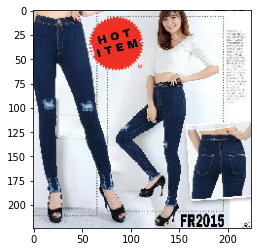

similarity score :  0.65199035


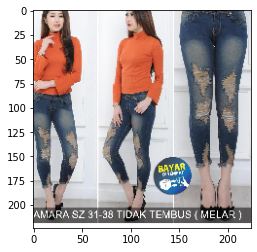

similarity score :  0.65085214


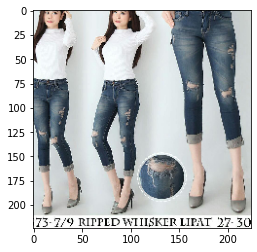

similarity score :  0.6432809


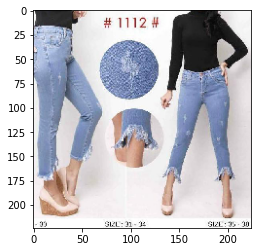

similarity score :  0.6353247


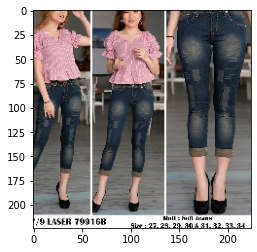

similarity score :  0.6315953


In [ ]:
for i in range(0,len(closest_imgs)):
  org=load_img(closest_imgs[i],target_size=(224,224))
  plt.imshow(org)
  plt.savefig(datapath+'/SVM&CNN/similar'+str(i)+'.png')
  plt.show()
  print("similarity score : ",closest_imgs_scores[i])